In [75]:
from mlconfound.simulate import simulate_y_c_yhat, sigmoid

w_yc=3.0
w_yyhat=3.0
w_cyhat=3 # H0
n=50

y, c, yhat =simulate_y_c_yhat(w_yc=w_yc,
                              w_yyhat=w_yyhat, w_cyhat=w_cyhat,
                              n=n,
                              random_state=42,
                              delta=1,
                              epsilon=0,
                              nonlin_trf_fun=sigmoid)

In [76]:
from pygam import LinearGAM
import pandas as pd

df = pd.DataFrame({
        'Z': c,
        'X': y
    })
default_kwargs = {'n_splines': 8, 'dtype': ['numerical']}
model_kwargs = {**default_kwargs}
fit = LinearGAM(**model_kwargs).gridsearch(y=df.X, X=df.Z.values.reshape(-1, 1),
                                               progress=False)

<AxesSubplot:xlabel='Z', ylabel='X'>

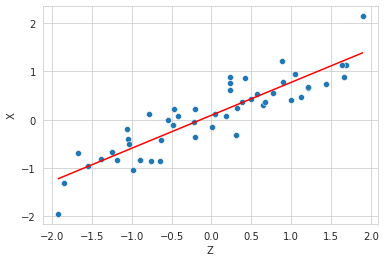

In [77]:
import seaborn as sns
sns.set_style("whitegrid")
sns.scatterplot(x=df.Z, y=df.X)
sns.lineplot(x=df.Z, y=fit.predict(df.Z.values.reshape(-1, 1)), color='red')

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

df = pd.DataFrame({
        'Z': c,
        'X': y
    })

p_grid = {
    'max_depth': [1,2,3,4,10,50],
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 10, 50, 100]
}

cv = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=p_grid, cv=10,
                   scoring="neg_mean_squared_error", return_train_score=False,
                   n_jobs=-1)
fit = cv.fit(y=df.X, X=df.Z.values.reshape(-1, 1))
cv.best_params_

{'max_depth': 3, 'n_estimators': 2}

<AxesSubplot:xlabel='Z', ylabel='X'>

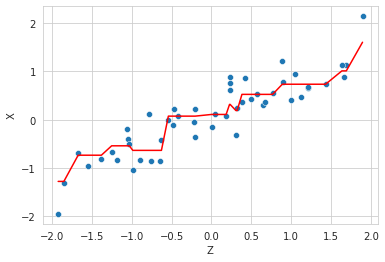

In [79]:
sns.scatterplot(x=df.Z, y=df.X)
sns.lineplot(x=df.Z, y=cv.best_estimator_.predict(df.Z.values.reshape(-1, 1)), color='red')